In [ ]:
%matplotlib inline


# Recognizing hand-written digits


An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
`tutorial section of the user manual <introduction>`.




In [1]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
images_and_labels

Automatically created module for IPython interactive environment


[(array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
         [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
         [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
         [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
         [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
         [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
         [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
         [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]]), 0),
 (array([[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
         [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
         [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
         [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
         [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]]), 1),
 (array([[  0.,   0.,   0.,   4.,  15.,  12.

In [3]:
%matplotlib inline 

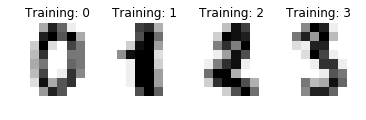

In [4]:
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)



In [8]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
print(n_samples)
data = digits.images.reshape((n_samples, -1))
data

1797


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [7]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
print(expected)
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))



[8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9
 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9
 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1
 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 7 8 2 0
 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9
 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3
 9 1 7 6 8 4 3 1 4 0 5 3 

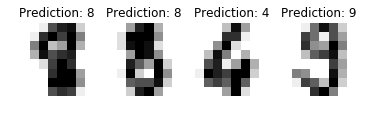

In [9]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()